# Accessing the image's meta-data

> In this tutorial we will learn how to access and manipulate the image's meta-data form the header.

During the [image loading tutorial]((http://link-to-previous-tutorial-on-image-loading.de "Load, threshold and save an image") we obtained beside the image data as numpy array an additional header object. Let's first load our usual image.

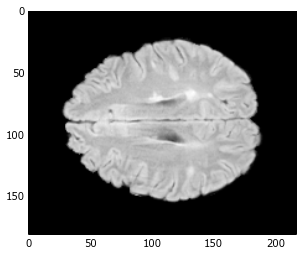

In [1]:
%matplotlib inline

from medpy.io import load
import matplotlib.pyplot as plt
import matplotlib.cm as cm

i, h = load("flair.nii.gz")

plt.imshow(i, cmap = cm.Greys_r);

Now let's take a look at the header.

In [3]:
print(h)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (181, 217)
affine: 
[[-1.  0.  0.  0.]
 [ 0. -1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : 
db_name         : 2020503_10_1_N3Cor
extents         : 0
session_error   : 0
regular         : r
dim_info        : 0
dim             : [  2 181 217   1   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [ 1.  1.  1.  1.  1.  1.  1.  1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 84666
glmin           : -4828
descrip         : Unknown Modality
aux_file        : 
qform_code      : scanner
sform_code      : unk

That is quite a lot of information and the header appear to be of class 'nibabel.nifti1.Nifti1Image'. The reason behind this is that **MedPy** relies on third party librarier to save and load image. To keep the compatibility high and the maintenance requirements at a minimum, **MedPy** does not posess a dedicated header object, but instead returns the third party libraries image object as pseudo-header (don't worry, the image data is not kept twice).

Depending on the third party library used, a different kind of header object can be returned. To provide image format independent access to the most important header attributes, **MedPy** provides some accessor-functions that work with all type of headers.

To query the image's voxel spacing, you can use the following.

In [8]:
from medpy.io import header

print header.get_pixel_spacing(h)

(1.0, 1.0)


And correspondingly for the offest.

In [9]:
print header.get_offset(h)

(-0.0, -0.0)


Both of these values can also be set,

In [10]:
header.set_pixel_spacing(h, (0.8, 1.2))

print header.get_pixel_spacing(h)

(0.80000001, 1.2)


Saving the array with the modified header, the new meta-data are stored alongside the image.

In [11]:
from medpy.io import save

save(i, "flair_distorted.nii.gz", h, force=True)
j, hj = load("flair_distorted.nii.gz")

print header.get_pixel_spacing(h)

(0.80000001, 1.2)


Further meta-data from the headers is largely incompatible between formats. If you require access to additional header attributes, you can do this by querying the image header object directly. In the above case of a [NiBabel](http://nipy.org/nibabel/ "NiBabel") class, you can, for example, query the infamous 'qform_code' of the NIfTI format.

In [12]:
print(h.header['qform_code'])

1


But be warned that such an approach leads to image format and image loade dependent code.